In [2]:
import pickle
import os
import numpy as np
import cv2

In [3]:
dp = "/home/wsx/pointcloud_research/data/nuscenes/tmp"

In [4]:
# nuscenes_infos_val.pkl
# nuscenes_infos_test.pkl
# nuscenes_infos_train.pkl
# nuscenes_dbinfos_train.pkl

In [5]:
with open(os.path.join(dp, "nuscenes_infos_train.pkl"), 'rb') as f:
    file = pickle.load(f)

In [6]:
metainfo = file["metainfo"]
data_list = file["data_list"]

In [7]:
# 'car': 0,
# 'truck': 1,
# 'trailer': 2,
# 'bus': 3,
# 'construction_vehicle': 4,
# 'bicycle': 5,
# 'motorcycle': 6,
# 'pedestrian': 7,
# 'traffic_cone': 8,
# 'barrier': 9

In [21]:
# categories
# dataset
# version
# info_version

In [23]:
# sample_idx
# token
# timestamp
# ego2global
# images
# lidar_points
# instances
# cam_instances

In [8]:
data_list[0]["lidar_points"]

{'num_pts_feats': 5,
 'lidar_path': 'n015-2018-07-18-11-07-57+0800__LIDAR_TOP__1531883530449377.pcd.bin',
 'lidar2ego': [[0.0020332718268036842,
   0.9997040629386902,
   0.024241721257567406,
   0.9437130093574524],
  [-0.9999805092811584, 0.0021756570786237717, -0.00584863917902112, 0.0],
  [-0.005899650044739246,
   -0.02422935888171196,
   0.9996890425682068,
   1.8402299880981445],
  [0.0, 0.0, 0.0, 1.0]]}

In [7]:
data_list[0]["images"]

{'CAM_FRONT': {'img_path': 'n015-2018-07-18-11-07-57+0800__CAM_FRONT__1531883530412470.jpg',
  'cam2img': [[1266.417203046554, 0.0, 816.2670197447984],
   [0.0, 1266.417203046554, 491.50706579294757],
   [0.0, 0.0, 1.0]],
  'cam2ego': [[0.005684778559952974,
    -0.005636667832732201,
    0.9999679327011108,
    1.7007912397384644],
   [-0.9999834895133972,
    -0.0008371152798645198,
    0.0056801484897732735,
    0.01594563201069832],
   [0.000805071322247386,
    -0.9999837875366211,
    -0.005641333758831024,
    1.5109575986862183],
   [0.0, 0.0, 0.0, 1.0]],
  'sample_data_token': '020d7b4f858147558106c504f7f31bef',
  'timestamp': 1531883530.41247,
  'lidar2cam': [[0.999950110912323,
    -0.006949238944798708,
    0.007174408063292503,
    0.005730343982577324],
   [0.007305425126105547,
    0.019015269353985786,
    -0.9997925162315369,
    -0.321853369474411],
   [0.0068113734014332294,
    0.9997950196266174,
    0.019065087661147118,
    -0.6021451950073242],
   [0.0, 0.0, 0.0

In [7]:
cameraloc = data_list[0]["images"].keys()

In [8]:
cameraloc

dict_keys(['CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_FRONT_LEFT', 'CAM_BACK', 'CAM_BACK_LEFT', 'CAM_BACK_RIGHT'])

In [38]:
imgdp = "/home/wsx/pointcloud_research/data/nuscenes/samples"
for i in range(len(data_list)):
    imgs = []
    for filename in cameraloc:
        imgname = data_list[i]["images"][filename]["img_path"]
        imgs.append(cv2.imread(os.path.join(imgdp, f"{filename}/{imgname}")))
    Hori1 = np.concatenate((imgs[2], imgs[0], imgs[1]), axis=1)
    Hori2 = np.concatenate((imgs[5], imgs[3], imgs[4]), axis=1)
    img = np.concatenate((Hori1, Hori2), axis=0)
    img = cv2.resize(img, (1600, 800))
    cv2.imshow("image", img)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()


In [5]:
data_list[0]["lidar_points"]

{'num_pts_feats': 5,
 'lidar_path': 'n015-2018-07-18-11-07-57+0800__LIDAR_TOP__1531883530449377.pcd.bin',
 'lidar2ego': [[0.0020332718268036842,
   0.9997040629386902,
   0.024241721257567406,
   0.9437130093574524],
  [-0.9999805092811584, 0.0021756570786237717, -0.00584863917902112, 0.0],
  [-0.005899650044739246,
   -0.02422935888171196,
   0.9996890425682068,
   1.8402299880981445],
  [0.0, 0.0, 0.0, 1.0]]}

In [30]:
# # intances
# bbox_label
# bbox_3d
# bbox_3d_isvalid
# bbox_label_3d
# num_lidar_pts
# num_radar_pts
# velocity

In [6]:
# write anno file
ap = "/home/wsx/pointcloud_research/data/nuscenes/anno_cplus/"

for item in data_list:
    fp = item["lidar_points"]["lidar_path"] + ".txt"
    with open(os.path.join(ap, fp), 'w') as f:
        for i in item["instances"]:
            f.write(str(i["bbox_label"])+" ")
            for j in i["bbox_3d"]:
                j = round(j, 2)
                f.write(str(j) + " ")
            f.write("\n")

In [39]:
colors = np.array(
    [[1.0, 0., 0.],
    [0, 1, 0],
    [0., 0., 1.],
    [1, 1, 0],
    [1., 0, 1],
    [0., 1., 1.],
    [0.3, 0, 0],
    [0., 0.3, 0.],
    [0, 0., 0.3],
    [0.3, 0.3 , 0]]
)

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [11]:
c = metainfo["categories"]

In [12]:
for i in c.items():
    print(i)

('car', 0)
('truck', 1)
('trailer', 2)
('bus', 3)
('construction_vehicle', 4)
('bicycle', 5)
('motorcycle', 6)
('pedestrian', 7)
('traffic_cone', 8)
('barrier', 9)


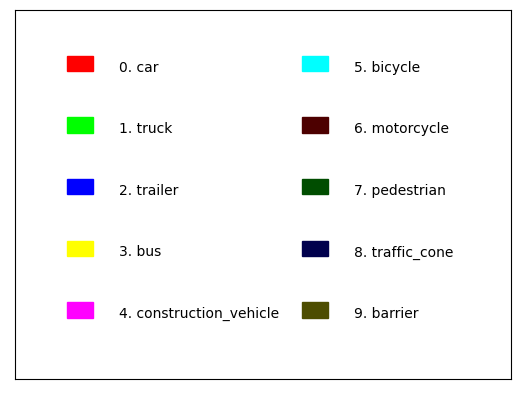

In [40]:
fig, ax = plt.subplots()
ax.set_xlim([0, 19])
ax.set_ylim([0, 12])
step = 2
loc = np.array((2, 10))
for name, i in c.items():
    if i < 5:
        pos = (loc[0], loc[1]-step*i)
    else:
        pos = (loc[0]+9, loc[1]-step*(i-5))
    ax.add_patch(Rectangle(pos, 1, 0.5, color=colors[i]))
    ax.text(pos[0]+2, pos[1], f"{i}. {name}")
    ax.set_xticks([])
    ax.set_yticks([])
plt.savefig("color_tables.png")
plt.show()
